# Project: Investigating the Noshow/Show of Patients to their medical appointments using the dataset; No_Show_Appointment

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#ques">Question</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each column, they are;

<ul>
    <li>PatientId: Identification of a patient</li>
    <li>AppointmentID: Identification of each appointment</li>
    <li>Gender: Male or Female</li>
    <li>AppointmentDay: The day of the actual appointment, when they have to visit the doctor</li>
    <li>ScheduledDay: The day someone called or registered the appointment, this is before appointment of course</li>
    <li>Age: How old is the patient</li>
    <li>Neighbourhood: Where the appointment takes place</li>
    <li>Scholarship: 1 or 0 representing True of False. This shows if the patient is on welfare or not</li>
    <li>Hipertension: 1 or 0 representing True or False</li>
    <li>Diabetes: 1 or 0 representing True or False</li>
    <li>Alcoholism: 1 or 0 representing True or False</li>
    <li>Handcap: 0, 1, 2, 3, 4 representing levels of handicap</li>
    <li>SMS_received: 1 or 0 messages sent to the patient</li>
    <li>No-show: True or False</li>
</ul>

<a id="ques"></a>
## Question


1) What factors are important for us to know inorder to predict if a patient will show up for their scheduled medical appointment?



### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed, randint
seed(100)
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import datetime



<a id='wrangling'></a>
## Data Wrangling

### Loading the dataset

In [2]:
ls

Database_Ncis_and_Census_data/  Database_TMDb_movie_data/
Database_No_show_appointments/  Investigate No_Show_Appointment-Copy1.ipynb
Database_Soccer/


In [3]:
cd"Database_No_show_appointments"

/home/workspace/Database_No_show_appointments


In [4]:
#Loading the dataset from the Database
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Getting the shape (number of rows and columns) of the dataset
df.shape

(110527, 14)

*This shows us that the dataset has "110527" rows and "14" columns*

In [7]:
#Getting the describtion of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#Checking if there is any empty(null) cell
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*There are no null cell in the dataset*

In [10]:
#Checking for Duplicates
df.duplicated().sum()

0

*There are no duplicates*

In [11]:
#Finding the unique count for each charateristics
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

*This gives us the number of unique values contained in each column*


### Data Cleaning

From visual inspection of the loaded dataset, some problems were observed, which will need to be cleaned. These problems includes;
<ul>
<li>Some column names were wronly spelt, and will need to be corrected to avoid issues of remembering the odd spellings during analysis</li>
<li>PatientId supposed to be an integer and not a float, so we will convert it to integer64</li>
<li>Datatype of ScheduledDay and AppointmentDay are object, so they will be converted to datatime datatype</li>
<li>The AppointmentDay time is set to 00:00:00 which does not make any sense, therefore, we will ignore it</li>
</ul>


### Correcting the above listed problems###

In [12]:
#Correcting the wrongly spelt Column names
df.rename(columns={"Hipertension":"Hypertension", "Handcap":"Handicap", "SMS_received":"SMSreceived", "No-show":"NoShow"}, inplace=True)

In [13]:
#Converting the datatype for the column "PatientId" from "Object" to "Integer64"
df["PatientId"] = df["PatientId"].astype("int64")

In [14]:
#Converting the datatype for scheduledDay to "datetime"
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)

In [15]:
#Converting the datatype for AppointmentDay to "datetime"
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

In [16]:
#Printing out few lines to check for comformity of corrections
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Getting the unique values of the columns
df.columns.unique()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'NoShow'],
      dtype='object')

In [18]:
#Getting the Unique values of "Age" 
df["Age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

**From the above array, it is obvious that "Age" contains some unrelialistic values like; "-1" which cannot be. There we replace them using the mean "Age"**


In [19]:
#Finding the mean "Age"
mean_age = df["Age"].mean()
mean_age

37.088874211731067

In [20]:
#Looping through all values in the "Age" column
#  if the value is <= (less than, or equals to) 0(zero)
#  we will replace it with the mean "Age"
for x in df.index:
    if df.loc[x, "Age"] < 0:
        df.loc[x, "Age"] = 37
      

In [21]:
#Checking the result
df["Age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

***The values have been change accordingly***

## The columns "PatientId" and "AppointmentID"are just patients unique identifiers and are of no use in answering the question posed by this analysis. Therefore, we will drop them

In [22]:
#dropping the column "PatientId" and "AppointmentID"
df.drop(["PatientId", "AppointmentID"], axis=1, inplace=True)

In [23]:
#Printing few lines from the dataset for check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*The columns have been dropped*

<a id='eda'></a>
## Exploratory Data Analysis






### Ques: What factors are important  for us to know inorder to predict if a patient will show up for their scheduled appointment?

>For us to be able to answer this question, a heuristic exploration and statistical analysis needs to be carried out on the various characteristics of the dataset inoder to know their correlation to a patient showing up to appointment or not.

## First, lets find out the level of correlation between the various dataset characteristics using a heat map

**First lets get the correlation between the various characteristics of the dataset using a heatmap**

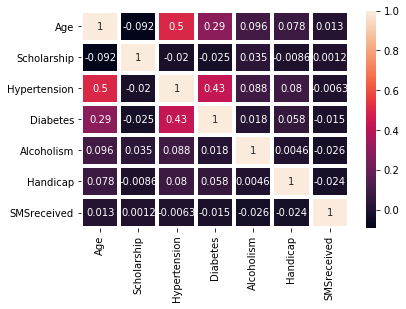

In [24]:
sns.heatmap(df.corr(), annot=True, linewidths= 3.0);

*From the correlation plot, we can see that "Hypertension" and "Age" have a positive correlation. This implies that as a patients Age increases, the patient will stand a chance of having an increased level of Hypertension and vise versa. Therefore, we will keep a keen eye on this two dataset characteristics, because both are likely to have similar correlation to a patients show up to appointment*

### Plotting a scatter plot of "Hypertension" and "Age"### 

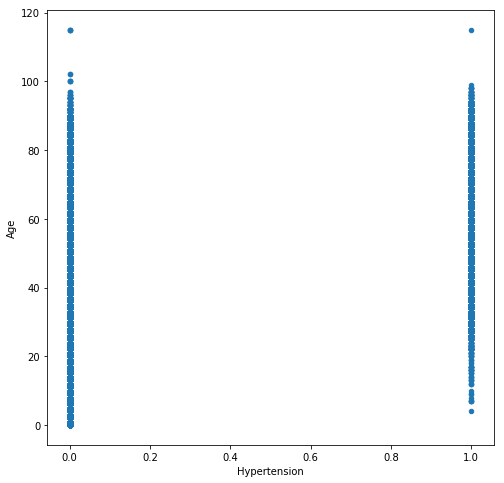

In [25]:
#Scatter plot of "Hypertension and "Age"
df.plot(kind= "scatter", x= "Hypertension", y= "Age", figsize= (8,8));

*From the plot, we can see that the scatter points forms a vertical linear pattern, and the points for patients with Hypertension and those without Hypertension peaks almost at the same Age. This attest to the fact that both Hypertension and Age have a position correlation.*

### Finding the date range for "ScheduledDay"

In [26]:
ScheduledDay_Range = df.ScheduledDay.unique()

In [27]:
#Loading the data
ScheduledDay_Range

array(['2016-04-29T18:38:08.000000000', '2016-04-29T16:08:27.000000000',
       '2016-04-29T16:19:04.000000000', ...,
       '2016-04-27T16:03:52.000000000', '2016-04-27T15:09:23.000000000',
       '2016-04-27T13:30:56.000000000'], dtype='datetime64[ns]')

*It can be seen that the ScheduleDay ranges from 2015-11-10 to 2016-06-08. This is about 7 months*

### Finding the Date Range of AppointmentDay

In [28]:
AppointmentDayRange = df.AppointmentDay.unique()

In [29]:
AppointmentDayRange

array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

*It can be seen that the AppointmentDay lapses between 2016-04-29 to 2016-06-08. This is about 1 month.*

### Finding the Total Number of patients that Showed-Up and the number of those that didn't show in the Dataset 

In [30]:
#Getting the unique value count
NoShow_Value = df.NoShow.value_counts()

In [31]:
NoShow_Value

No     88208
Yes    22319
Name: NoShow, dtype: int64

*From this result, it can be seen that the number of people that came for their appointment is; "88,208" while "22,319" didnt show up*

**Bar Plot of Unique Values of NoShow**

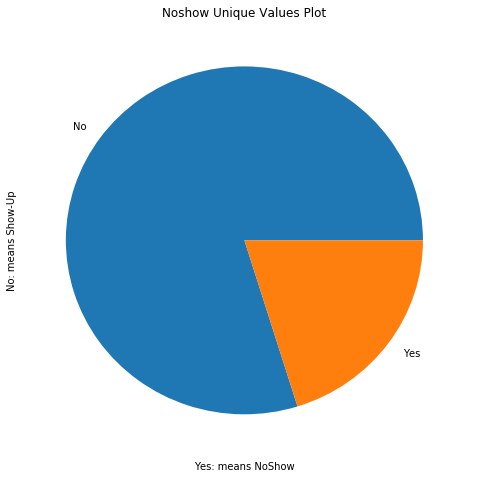

In [32]:
ax = NoShow_Value.plot(kind= "pie", title="Noshow Unique Values Plot", figsize= (8,8))
ax.set_xlabel("Yes: means NoShow")
ax.set_ylabel("No: means Show-Up");


*This chart gives us a clear visualization of the spread of patients Show_up and NoShow population. "No" represents those that showed up, while "Yes" represents those that didnt show up.*

In [33]:
#Finding the percentage representation of this values
df.NoShow.value_counts("%")*100

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

*The above shows us that 79.8% of appointments showed up, while 20.2% didnt show up*

## We will now use groupby and query function to see the correlation of various characteristics to NoShow


### Getting the Correlation of "Gender" and "NoShow"

In [34]:
#Extracting the unique value count of Gender
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

*This shows us that 71,840(65%) of the patients are Females, while 38,687(35%) are male*

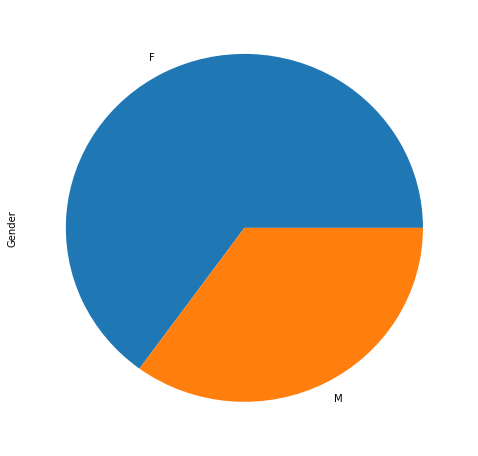

In [35]:
#Visualizing the Gender value count with a pie chart
df.Gender.value_counts().plot(kind= "pie", figsize= (8,8));

*As we can see, Females(F) spans a greater area of the chart than Males(M), showing that females have more number than males*

In [36]:
#Getting the correleration between Gender and NoShow using groupby
Gender_NoShow = df.groupby("NoShow")["Gender"]

In [37]:
gen = Gender_NoShow.value_counts()

In [38]:
gen

NoShow  Gender
No      F         57246
        M         30962
Yes     F         14594
        M          7725
Name: Gender, dtype: int64

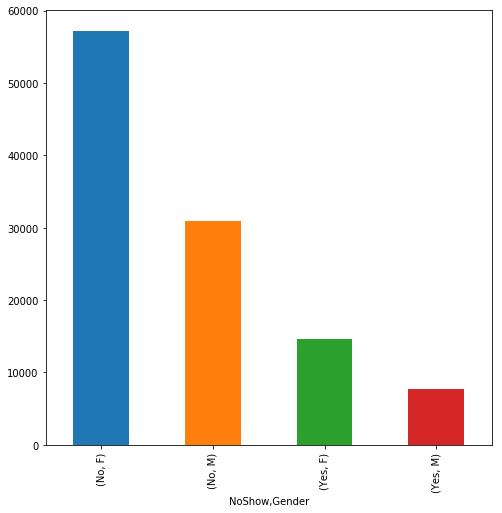

In [39]:
#Plotting a bar plot of correlation of the Unique values of Gender to NoShow
gen.plot(kind="bar", figsize=(8,8),);

From the data above, it can be seen that;
<ul>
<li>79.69%(57,246) of the Female patients showed up for their appointments</li>
<li>80.03%(30,962) of the Male patients showed up for their appointment</li>
</ul>

Since these values are approximately equal, we can conclude that "Gender" is not a determinant or predictor to "Noshow/Show-up" to appointment among patients.

## Getting the correlation of "Neighbourhood" to "NoShow"

In [40]:
#Getting the unique value of "Neigbourhood"
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [41]:
#Getting the unique count of Neighbourhood
df.Neighbourhood.nunique()

81

*This tells us that there are 81 unique Neigghbourhoods in the dataset*

In [42]:
#Getting the value count to "NoShow" info using groupby (by percentage)
Neigh_NoShow = df.groupby("Neighbourhood")["NoShow"].value_counts("%")

In [43]:
Neigh_NoShow

Neighbourhood        NoShow
AEROPORTO            No        0.875000
                     Yes       0.125000
ANDORINHAS           No        0.769673
                     Yes       0.230327
ANTÔNIO HONÓRIO      No        0.815498
                     Yes       0.184502
ARIOVALDO FAVALESSA  No        0.780142
                     Yes       0.219858
BARRO VERMELHO       No        0.784870
                     Yes       0.215130
BELA VISTA           No        0.798637
                     Yes       0.201363
BENTO FERREIRA       No        0.775058
                     Yes       0.224942
BOA VISTA            No        0.814103
                     Yes       0.185897
BONFIM               No        0.801659
                     Yes       0.198341
CARATOÍRA            No        0.769591
                     Yes       0.230409
CENTRO               No        0.789142
                     Yes       0.210858
COMDUSA              No        0.819355
                     Yes       0.180645
CONQUISTA   

**Plotting a bar plot to visualize the above percentage representation for "NoShow = No" only.**

In [44]:
df_perc = df[df.NoShow == "No"].groupby(["Neighbourhood"]).size()/df.groupby(["Neighbourhood"]).size()

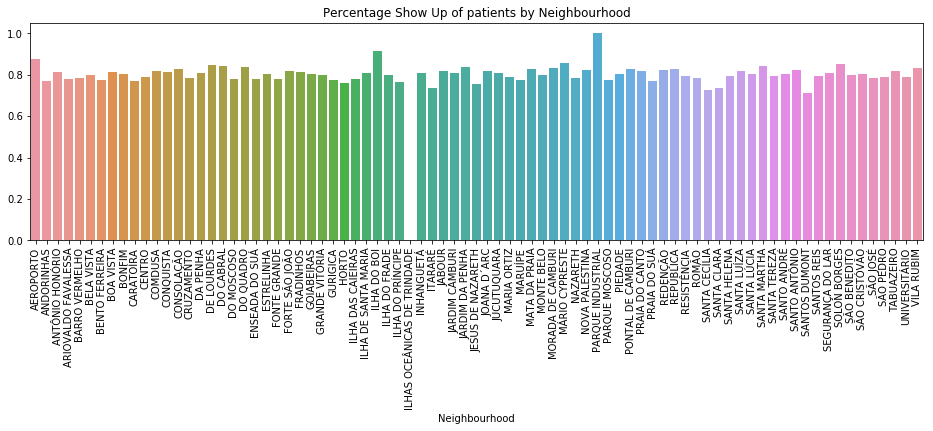

In [45]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_perc.index, y=df_perc)
ax.set_title("Percentage Show Up of patients by Neighbourhood")
plt.show()

**Plotting a graph of Number of Appointment by Neighbourhood**

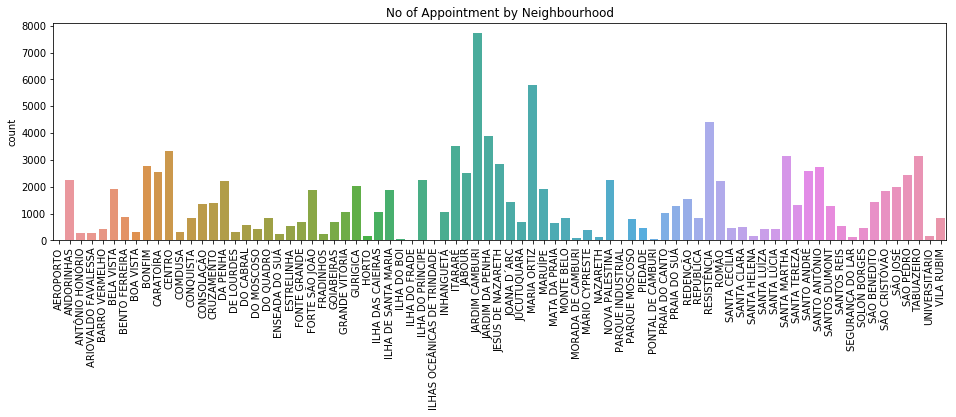

In [46]:
#Plotting a bar plot of Number of Appointment by Neighbourhood
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointment by Neighbourhood")
plt.show()

*From the plot above, we can see that few Neighbourhoods have high number of appointment.*

**Plotting a bar plot of NoShow/Show by Neighbourhood**

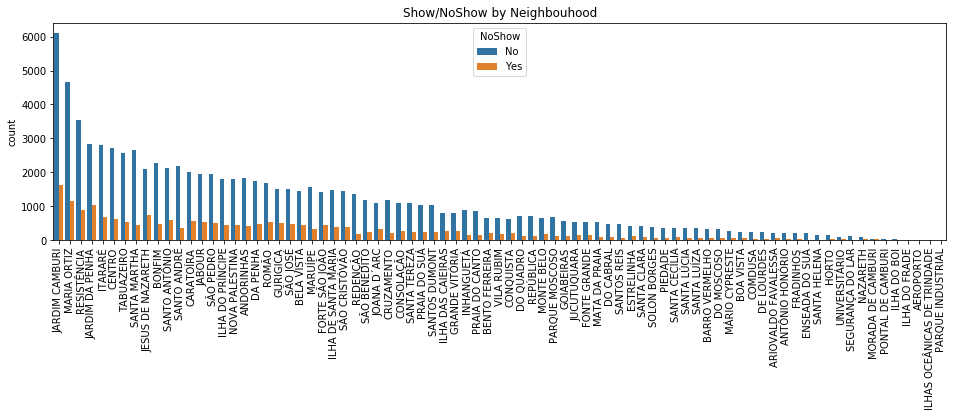

In [47]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood), hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
ax.set_title("Show/NoShow by Neighbouhood")
plt.show()

From the above statistics and plots. it is worth to note that;
<ul>
<li>The percentage Show-Up of patients for all the Neighbourhoods lies within the same range</li>
</ul>

Therefore, Since its obvious that the appointment Show-Up does not depend on the appointment Neighbourhood. Neighbourhood is not a determinant/predictor of Show-up to appointment.

## Getting the correlation of "Age" to "NoShow"

In [48]:
Age_NoShow = df.groupby("NoShow")["Age"]

In [49]:
AgeNo = Age_NoShow.value_counts()

In [50]:
#Getting the "NoShow" for patients below "Age" 11
AgeNoShow1 = df.query("Age < 11").NoShow.value_counts()

In [51]:
AgeNoShow1

No     14961
Yes     3788
Name: NoShow, dtype: int64

In [52]:
#Getting the "NoShow" for patients between "Age" 11-25
AgeNoShow2 = df.query("Age >= 11" and "Age <= 25").NoShow.value_counts()

In [53]:
AgeNoShow2

No     29781
Yes     8818
Name: NoShow, dtype: int64

In [54]:
#Getting the "NoShow" for patients between "Age" 26-55
AgeNoShow3 = df.query("Age >= 26" and "Age <= 55").NoShow.value_counts()

In [55]:
AgeNoShow3

No     65007
Yes    18016
Name: NoShow, dtype: int64

In [56]:
#Getting the "NoShow" for patients from "Age" 55 and above
AgeNoShow4 = df.query("Age > 55").NoShow.value_counts()

In [57]:
AgeNoShow4

No     23201
Yes     4303
Name: NoShow, dtype: int64

### Visualizing the "NoShow" by "Age Span" using Bar plot###

> This will be done by "Defining a Function" that will be called upon to plot the various plots. This is necessary to avoid code repititions.

In [58]:
#Defining a Function that will be called upon for bar plot of the various Age spans
def gnd(ds):
    plt.figure(figsize= (5,5), dpi=100)
    sns.barplot(x=ds.index, y=ds)
    plt.title("Age span Correlation to Show/NoShow")
    plt.ylabel("ShowUp/NoShow Count")
    plt.xlabel("(ShowUp=No, Noshow=Yes)");
plt.show()    

#### Plotting a Bar plot of NoShow/Show Appointment for "Age" 0-10yrs####

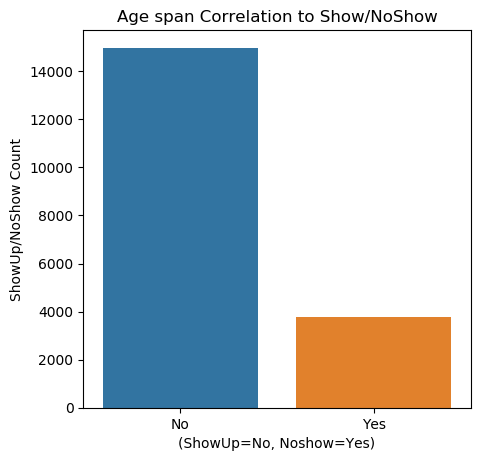

In [59]:
#Calling the function with the variable AgeNoShow1
gnd(AgeNoShow1)

#### Plotting a Bar plot of NoShow/Show Appointment for "Age" 11-25yrs####

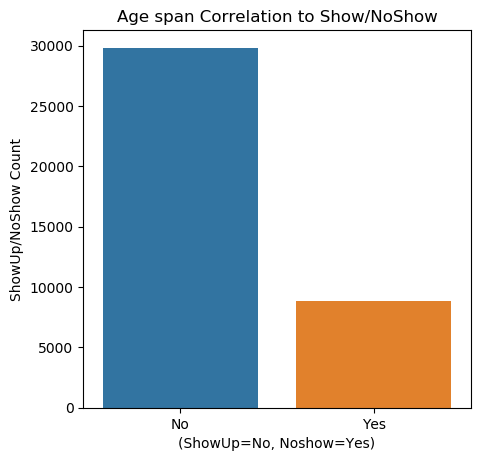

In [60]:
#Calling the function with the variable AgeNoShow2
gnd(AgeNoShow2)

#### Plotting a Bar plot of NoShow/Show Appointment for "Age" 26-55yrs####

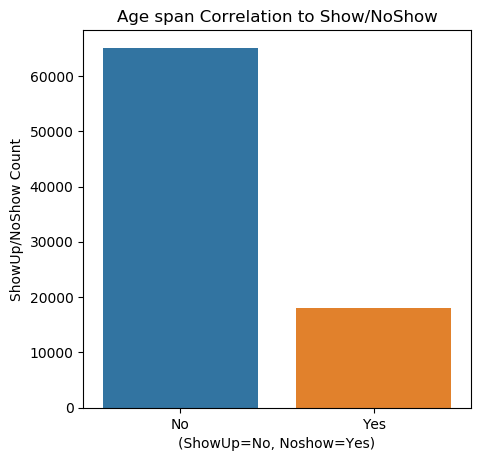

In [61]:
#Calling the function with the variable AgeNoShow3
gnd(AgeNoShow3)

#### Plotting a Bar plot of NoShow/Show Appointment for "Age" above 55####

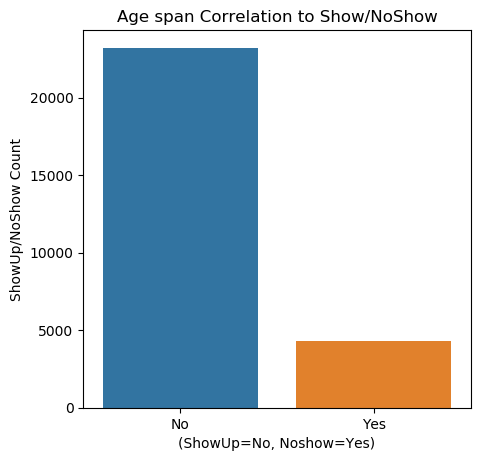

In [62]:
#Calling the function with the variable AgeNoShow4
gnd(AgeNoShow4)

From the statistics and plots above, we can see that for Age;
<ul>
    <li>Age 0-10: 79.9% of patients showed up</li>
    <li>Age 11-25: 77.15% of the patients showed up</li>
    <li>Age 26-55: 78.3% of the patients showed up</li>
    <li>Age 55 and above: 84.36% of the patients showed up</li>
</ul>
It's obvious from the above listed statistics that all the various age ranges have a high rate of turn-up, but patients that are above 50yrs of age have the highest turn-up percentage. This can be as a result of older individuals being susceptible or prone to diseases as a result of weakened Immune-system and the need for proper medical attention at this stage of their lives.

Thus, we can say that "Gender" is a determinant/predictor of NoShow/Show-up of patients to their appointments.

## Getting The Correlation of "Diabetes" to "NoShow''

In [63]:
#Extracting information about the unique value count of "Diabetes"
diabetes = df.Diabetes.value_counts()

In [64]:
#Loading the result
diabetes

0    102584
1      7943
Name: Diabetes, dtype: int64

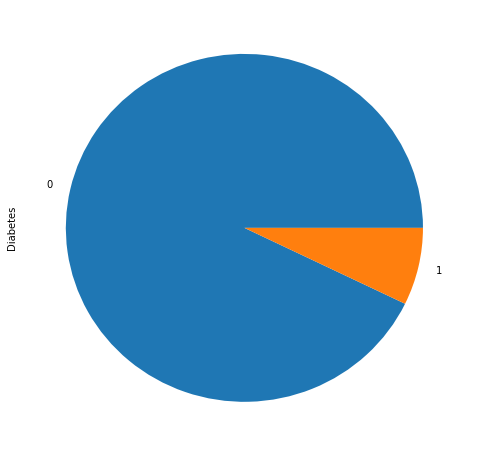

In [65]:
#Plotting a Pie plot of the above result for diabetes
diabetes.plot(kind ="pie", figsize=(8,8));

*The above results shows us that; patients without "Diabetes" are 102,584 while those with "Diabetes" are 7,943*

In [66]:
#Using groupby to get the corresponding "NoShow" result for each unique value of "Diabetes"
Diabetes_NoShow = df.groupby("Diabetes")["NoShow"].value_counts()

In [67]:
#Loading the data
Diabetes_NoShow

Diabetes  NoShow
0         No        81695
          Yes       20889
1         No         6513
          Yes        1430
Name: NoShow, dtype: int64

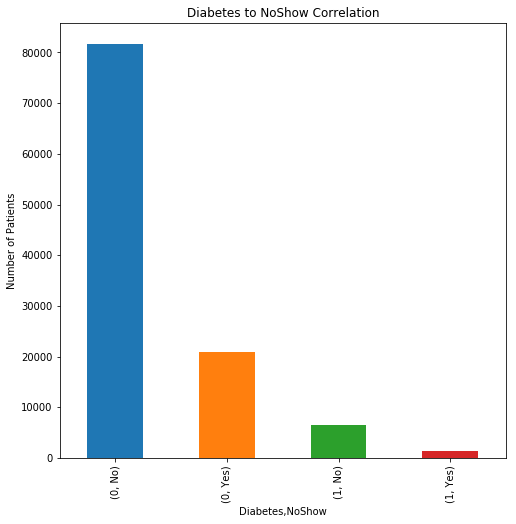

In [68]:
#Plotting a Bar plot "Diabetes,NoShow" against "Number of Patients"
ax = Diabetes_NoShow.plot(kind= "bar", title="Diabetes to NoShow Correlation", figsize= (8,8))
ax.set_xlabel("Diabetes,NoShow")
ax.set_ylabel("Number of Patients");

From the Bar plot above, it can be seen that;

<ul>
<li>Patients without Diabetes and Showed-up for their appointment have the highest number</li>
<li>Patients with Diabetes that showed up for their appointment are fewer</li>
</ul>

Thus, we can say that; Diabetes is not a strong determinant that a patient will show up their appointment




## Getting the Correlation of "SMSreceived" to "NoShow"

In [69]:
#Extracting information about the unique value counts of "SMSreceived"
sms_received = df["SMSreceived"].value_counts()

In [70]:
#Loading the result for sms_received
sms_received

0    75045
1    35482
Name: SMSreceived, dtype: int64

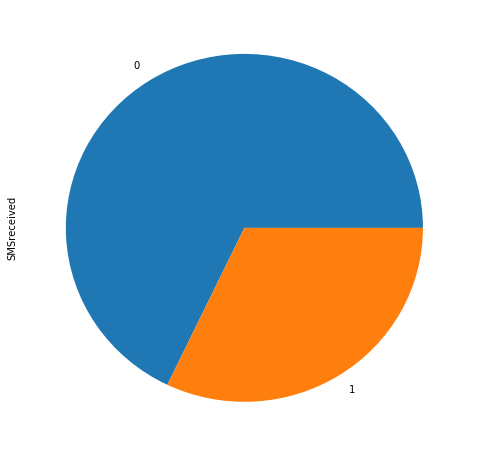

In [71]:
#Visualizing the result using a pie chart
sms_received.plot(kind= "pie", figsize= (8,8));

*The above results shows us that; patients that received SMS are 35,482(32.1%), while those that receive SMS are 75,045(67.9%)*

In [72]:
#Using groupby to get the corresponding value of "NoShow" for each unique value of "SMSreceived"
SMS_NoShow = df.groupby("SMSreceived")["NoShow"].value_counts()

In [73]:
SMS_NoShow

SMSreceived  NoShow
0            No        62510
             Yes       12535
1            No        25698
             Yes        9784
Name: NoShow, dtype: int64

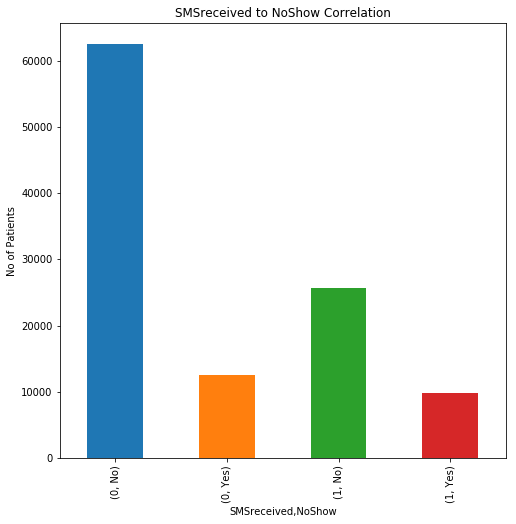

In [74]:
#Plotting a Bar Plot of the Correlation
ax = SMS_NoShow.plot(kind ="bar", title="SMSreceived to NoShow Correlation", figsize= (8,8))
ax.set_xlabel("SMSreceived,NoShow")
ax.set_ylabel("No of Patients");

From the information above, it can be deduced that;
<ul>
<li>Out of the 35,482 patients that received SMS, 72.43% showed up for there appointment, while 16.7% didnt show up</li>
<li>Out of the 75,045 that didnt receive SMS, 83.3% showed for their appointment, while 16.7% didnt show up</li>
</ul>
Thus, since those that didnt receive SMS have a higher percentage of show up than those that received, "SMSreceived" is not a strong predictor of appointment show-up.

## Getting the Correlation of "Scholarship" to "NoShow"

In [75]:
#Extracting information on unique value count of "Scholarship"
scholarship = df["Scholarship"].value_counts()

In [76]:
#Loading the result
scholarship

0    99666
1    10861
Name: Scholarship, dtype: int64

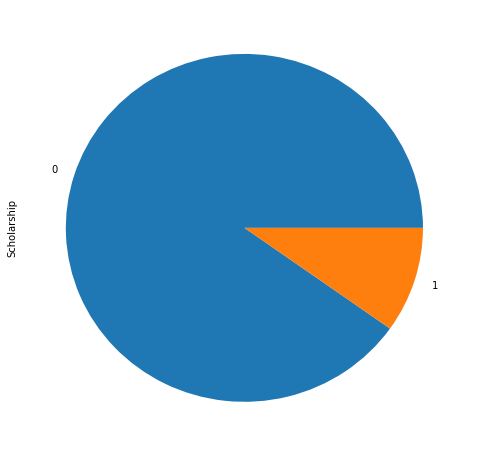

In [77]:
#visualizing the result using pie chart
scholarship.plot(kind = "pie", figsize= (8,8));

*This tells us that there are 99,666 patients without Scholarships and 10,861 with Scholarship*

In [78]:
#Using groupby to get the corresponding value of "NoShow"
Scholarship_NoShow = df.groupby("Scholarship")["NoShow"].value_counts()

In [79]:
Scholarship_NoShow

Scholarship  NoShow
0            No        79925
             Yes       19741
1            No         8283
             Yes        2578
Name: NoShow, dtype: int64

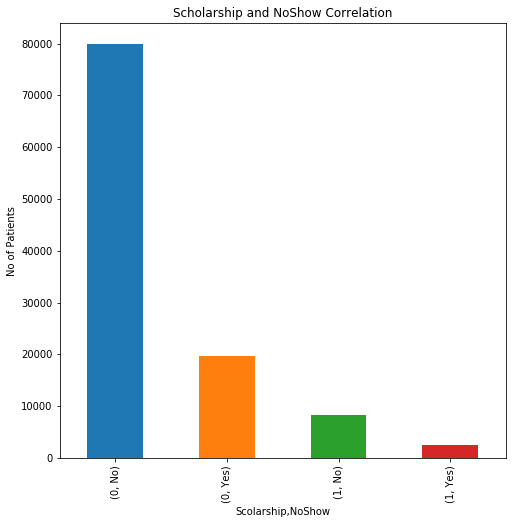

In [80]:
#Plotting a Bar plot of the correlation
ax = Scholarship_NoShow.plot(kind= "bar", title="Scholarship and NoShow Correlation", figsize= (8,8))
ax.set_xlabel("Scolarship,NoShow")
ax.set_ylabel("No of Patients");

From the statistics above, it can be seen that;
<ul>
<li>Out of the 10,861 patients that have Scholarship, 76.26% showed up to their appointment, while 23.74% didnt show up</li>
<li>Out of the 99,666 patients that didnt receive Scholarship, 80.19% showed up for their appointment, while 19.81% didnt show up</li>
</ul>
Thus, since the percentage of Show-up for people that didnt receive the Scholarship is greater than that of those that received Scholarship, it can be concluded that Scholarship is not a strong determinant for showup, because even a greater percentage of patients that didnt receive Scholarship still showed up for their appointment.
This meant that some other factor was a major contributor to Show-Up rather than Scholarship.

## Getting the Correlation of "Handicap" to "NoShow"

In [81]:
#Extracting information on unique value counts for "Handicap"
df["Handicap"].unique()

array([0, 1, 2, 3, 4])

In [82]:
#Getting the value counts for the various levels of handicap
handicap = df["Handicap"].value_counts()

In [83]:
#Loading the result
handicap

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

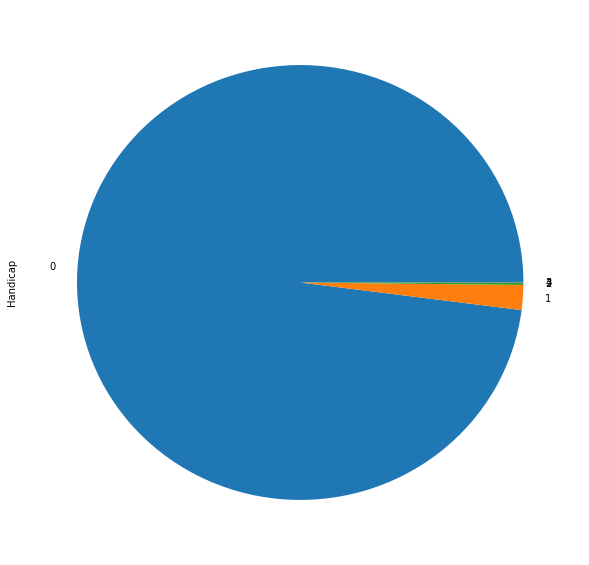

In [84]:
#Visualizing the result using a pie chart
handicap.plot(kind= "pie", figsize=(10,10));

*This results shows us that; patients with 0(zero) handicap are 108,286(97.97%), those with 1(one) handicap are 2,042(1.85%), those with 2 handicaps are 183(0.17%), those with 3(three) handicaps are 13(0.012%), while those with 4(four) handicaps are 3(0.0027%)*  

In [85]:
#Getting the correlation with "Noshow" using groupby
Handicap_NoShow = df.groupby("Handicap")["NoShow"].value_counts()

In [86]:
#Loading the data
Handicap_NoShow

Handicap  NoShow
0         No        86374
          Yes       21912
1         No         1676
          Yes         366
2         No          146
          Yes          37
3         No           10
          Yes           3
4         No            2
          Yes           1
Name: NoShow, dtype: int64

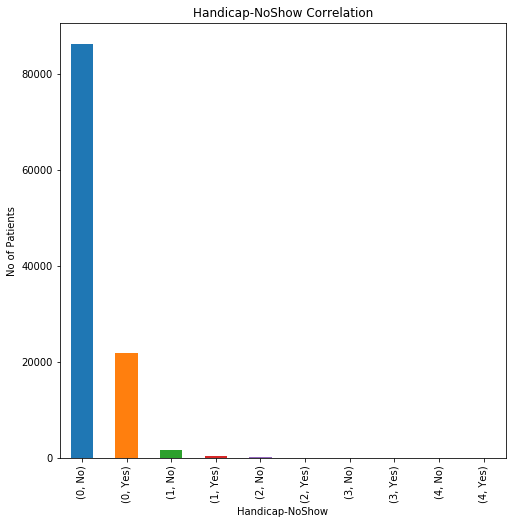

In [87]:
#plotting a Bar plot of the Correlation
ax = Handicap_NoShow.plot(kind= "bar", title="Handicap-NoShow Correlation", figsize= (8,8))
ax.set_xlabel("Handicap-NoShow")
ax.set_ylabel("No of Patients");

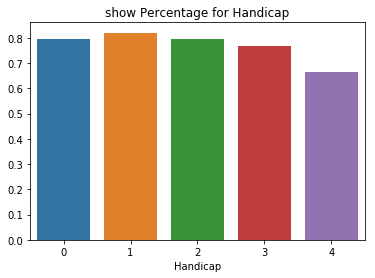

In [88]:
#Getting the Percentage Handicap
df_new = df[df.NoShow == "No"].groupby(['Handicap']).size()/df.groupby(["Handicap"]).size()
ax = sns.barplot(x=df_new.index, y=df_new)
ax.set_title("show Percentage for Handicap");

From the above statistics and plots;
<ul>
<li>97.97% of the patients are not Handicap and out of this, 79.76% showed up for their appointment</li>
<li>Of the 2241 patients that have 1-4 type of handicap, 81.84% showed up for their appointments</li>
<li>From the Handicap Percentage Bar plot, it can be seen that each level of Handicap has a distinct percentage which signify its share of the patient count</li>
</ul>
From the points highlighted above, its obvious that "Handicap" is a predictor and determinant for Show-Up/No-Show to appointments. 

## Getting the Correlation of "Hypertension" to "NoShow"

In [89]:
#Extracting information on unique values count of "Hypertension"
hypertension = df.Hypertension.value_counts()

In [90]:
#Loading the result
hypertension

0    88726
1    21801
Name: Hypertension, dtype: int64

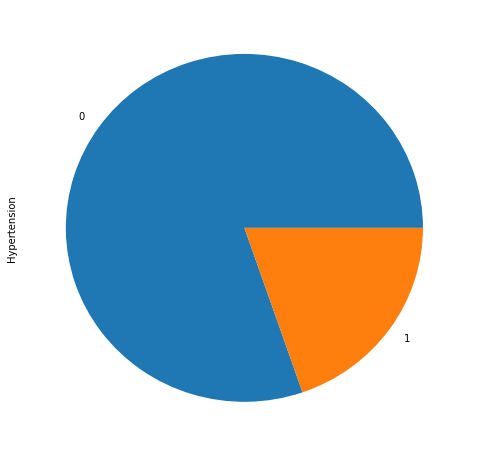

In [91]:
#Visualizing the result using a piechart
hypertension.plot(kind ="pie", figsize =(8,8));

*This tells us that 88,726(80.28%) patients does not have Hypertension, while 21,801(19.72%) have Hypertension*

In [92]:
#Getting the Correlation with "NoShow" using groupby() method
Hyper_NoShow = df.groupby("Hypertension")["NoShow"].value_counts()

In [93]:
#Loading the data
Hyper_NoShow

Hypertension  NoShow
0             No        70179
              Yes       18547
1             No        18029
              Yes        3772
Name: NoShow, dtype: int64

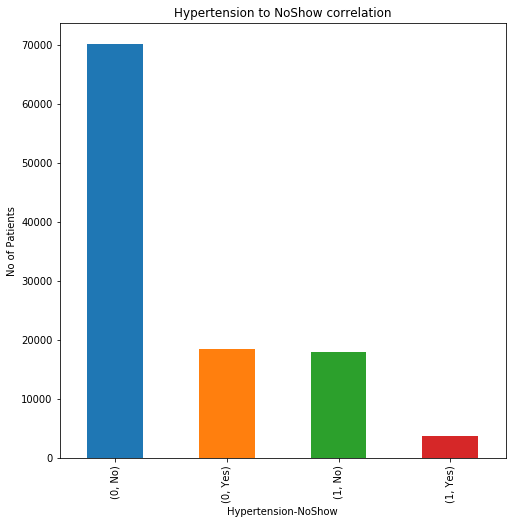

In [94]:
#Plotting a Bar Plot of the Correlation
ax = Hyper_NoShow.plot(kind ="bar", title="Hypertension to NoShow correlation", figsize= (8,8))
ax.set_xlabel("Hypertension-NoShow")
ax.set_ylabel("No of Patients");

From the above derived information;
<ul>
<li>The percentage of patients with Hypertension that showed up for their appointment is 82.7%</li>
<li>The percentage of patients without Hypertension that showed up for their appointment is 79.1%</li>
</ul>
From the above listed points, it can be seen that the percentage of a "patient with Hypertension" showing up for appointment is greater than the percentage of a "patient without Hypertension" showing up for their appointment. Thus, Hypertension is a predictor and determinant of Show-Up to an appointment.

## Getting the Correlation of "Alcoholism" to "NoShow"

In [95]:
#Extracting information about the unique values of "Alcohoism"
alcoholism = df["Alcoholism"].value_counts()

In [96]:
#Loading the result
alcoholism

0    107167
1      3360
Name: Alcoholism, dtype: int64

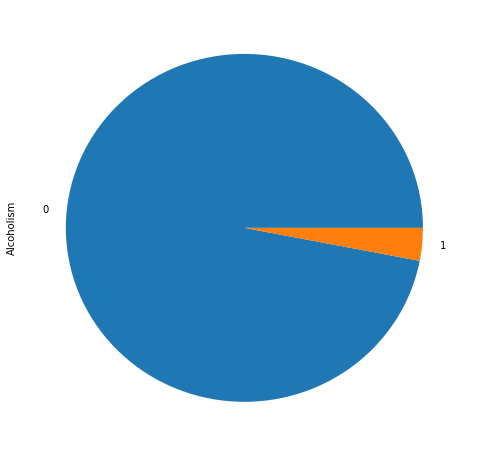

In [97]:
#Visualizing the result using a pie chart
alcoholism.plot(kind ="pie", figsize= (8,8));

*This tells us that there are 107,167(96.96%) patients without alcoholism issues, while 3,360(3.04%) do have alcoholism issues*

In [98]:
#Getting the Correlation with NoShow
Alcohol_NoShow = df.groupby("Alcoholism")["NoShow"].value_counts()

In [99]:
#Loading the data
Alcohol_NoShow

Alcoholism  NoShow
0           No        85525
            Yes       21642
1           No         2683
            Yes         677
Name: NoShow, dtype: int64

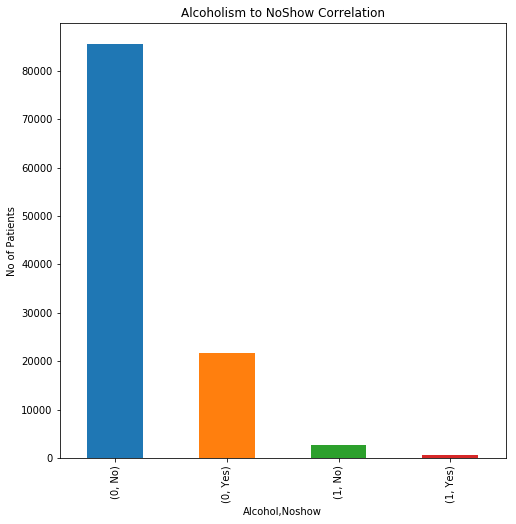

In [100]:
#Plotting a Bar Plot of the Correleration
ax = Alcohol_NoShow.plot(kind= "bar", title="Alcoholism to NoShow Correlation", figsize= (8,8))
ax.set_xlabel("Alcohol,Noshow")
ax.set_ylabel("No of Patients");

From the above information;
<ul>
    <li>The percentage of patients with Alcoholism that showed up to their appointment is 79.85%</li>
    <li>The percentage of patients without Alcoholism that showed up to their appointments is 79.81%</li>
</ul>

From the above highlighted points, we can see that patients with Alcolism and those without Alcoholism have the same Show Up percentage.

Therefore, Alcoholism is not a predictor and determinant of appointment Show-up

<a id='conclusions'></a>
## Conclusions

From the conclusions derived for each unique corellation analysis, we can conclude that:

>Characteristics like Hypertension, Handicap, Gender, Age are all important factors in predicting if a patient will show up to an appointment.


<a id="limitations"></a>
## Limitations

>There are observed limitations of the dataset and this includes:<ul>
    <li>The distance to the appointment Neighbourhood from the patients location was not provided. This would have helped to give more insight about the Show_Up/No-Show population, by exploring the distance between the patients location to the appointment Neighbourhood and analyzing the correlation between distance to Show/NoSow, thereby knowing if distance to the Show/NoShow</li>
    <li>AppointmentDay spans only for about a month, compared to ScheduledDay that spans to about 7 months. This but  represents a glimpse of the data and its analysis does not make a true representation of the whole data</li>
    <li>The reason for the scheduled appointment was not given. The reason for the appointment would have told us if the reason is a serious one that a No-Show would have been odd. Or if the scheduled appointment was just for a minor complaint that wouldnt be odd if the patient didnt show up.</li>
    <li>The AppointmentDay time was set to 00:00:00. This time would have given us another insight on whether there is a correlation between the time of appointment to show up to the appointment</li>
</ul>


In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255